In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, CategoricalNB
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

***ЗАДАНИЕ 1***

Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на точность классификации или на вероятность ошибочной классификации в примере крестики-нолики и примере о спаме e-mail сообщений.



In [33]:
def get_tt_xyxy(test_size):
    data_tt = pd.read_csv("Tic_tac_toe.txt")
    data_tt.positive = data_tt.positive.map(lambda p: int(p == 'positive'))
    enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    enc.fit(data_tt)
    data = pd.DataFrame(data=enc.transform(data_tt))
    
    last_col = len(columns) - 1
    X, y = data.drop(columns=[last_col]), data[last_col]
    return train_test_split(X, y, test_size=test_size, random_state=42)

def get_spam_xyxy(test_size):
    data = pd.read_csv("spambase.data", header=None)
    last_col = len(columns) - 1
    X, y = data.drop(columns=[last_col]), data[last_col]
    return train_test_split(X, y, test_size=0.1, random_state=42)

In [2]:
data_tt = pd.read_csv("Tic_tac_toe.txt")
data_tt.positive = data_tt.positive.map(lambda p: int(p == 'positive'))
data_tt.head()

x x.1 x.2 x.3  o o.1 x.4 o.2 o.3  positive
0  x   x   x   x  o   o   o   x   o         1
1  x   x   x   x  o   o   o   o   x         1
2  x   x   x   x  o   o   o   b   b         1
3  x   x   x   x  o   o   b   o   b         1
4  x   x   x   x  o   o   b   b   o         1

In [3]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc.fit(data_tt)
data = pd.DataFrame(data=enc.transform(data_tt))

In [4]:
X, y = data.drop(columns=[28]), data[28]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [5]:
clf_tt = CategoricalNB()
clf_tt.fit(X_train, y_train)

CategoricalNB()

In [6]:
clf_tt.score(X_test, y_test)

0.9988399071925754

In [11]:
data = pd.read_csv("spambase.data", header=None)
data.head()

0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]

In [32]:
X, y = data.drop(columns=[57]), data[57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
clf_tt = GaussianNB()
clf_tt.fit(X_train, y_train)
clf_tt.score(X_test, y_test)

0.8351409978308026

***ЗАДАНИЕ 2***

Сгенерируйте 100 точек с двумя признаками X1 и X2 в соответствии с нормальным распределением так, что первые 50 точек (class -1) имеют параметры: мат. ожидание X1  равно 10, мат. ожидание X2 равно 14, среднеквадратические отклонения для обеих переменных равны 4. Вторые 50 точек (class +1) имеют параметры: мат. ожидание X1 равно 20, мат. ожидание X2 равно 18, среднеквадратические отклонения для обеих переменных равны 3. Построить соответствующие диаграммы, иллюстрирующие данные. Построить байесовский классификатор и оценить качество классификации.

In [277]:
first = np.random.normal(loc=(10, 14), scale=(4, 4), size=(50, 2))
second = np.random.normal(loc=(20, 18), scale=(3, 3), size=(50, 2))

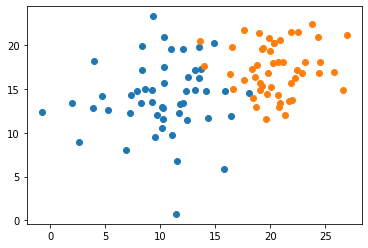

In [278]:
plt.scatter(first[:, 0], first[:, 1])
plt.scatter(second[:, 0], second[:, 1])

In [279]:
def get_Xy_points(first, second):
    X_points = pd.DataFrame(first).join(pd.DataFrame({'class': np.zeros(50)} ))\
    .append(pd.DataFrame(second).join(pd.DataFrame({'class': np.ones(50)} )), ignore_index=True)
    y_points = X_points['class']
    X_points = X_points.drop('class', axis=1)
    return X_points, y_points

X_points, y_points = get_Xy_points(first, second)

In [280]:
stupid_clf = GaussianNB()
stupid_clf.fit(X_points, y_points)

GaussianNB()

In [281]:
# точность на нашей выборке; эту функцию я написал потому, что не помнил про метод .score()
def test(model, X, y_correct):
    y_test = model.predict(X)
    return 1 - (y_test != y_correct).sum() / len(y_test)
test(stupid_clf, X_points, y_points)

0.95

In [282]:
# сгенерируем новые точки для теста
first1 = np.random.normal(loc=(10, 14), scale=(4, 4), size=(50, 2))
second1 = np.random.normal(loc=(20, 18), scale=(3, 3), size=(50, 2))
X_test_points, y_test_points = get_Xy_points(first1, second1)
test(stupid_clf, X_test_points, y_test_points)

0.97

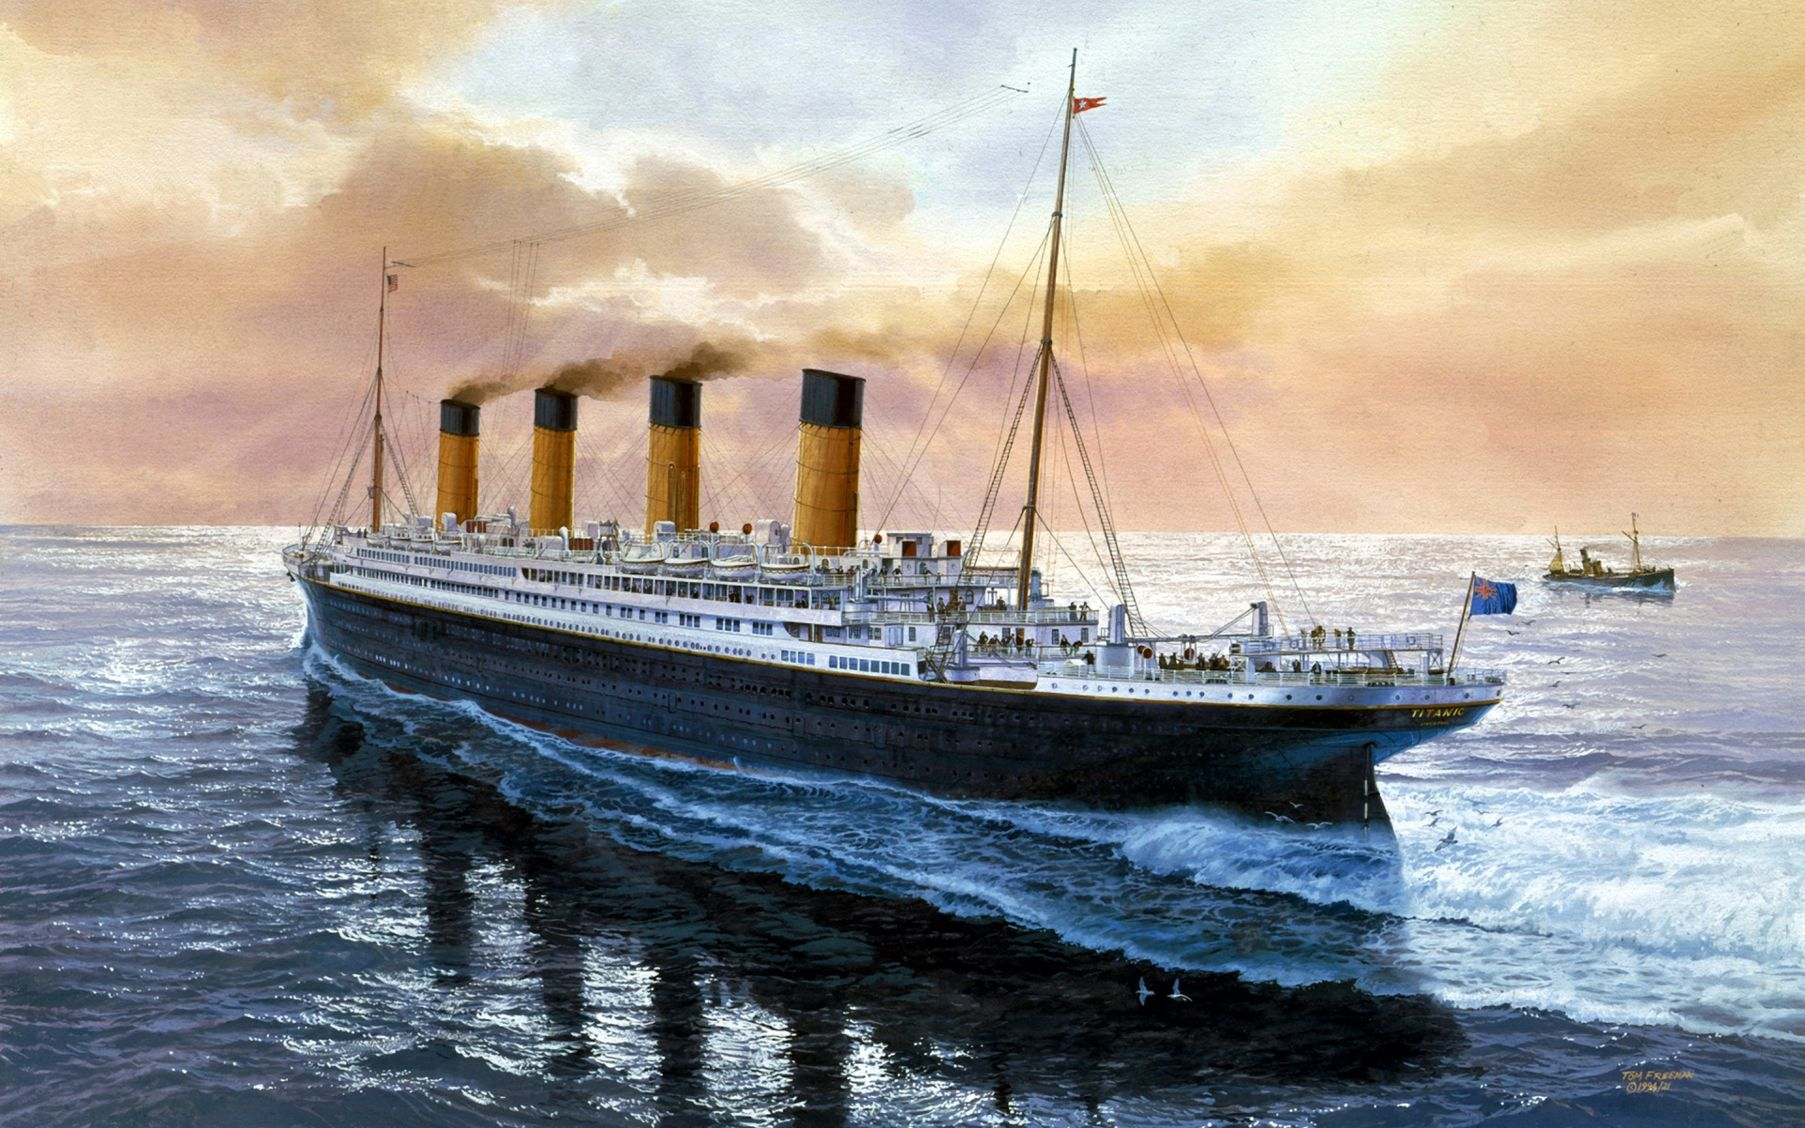

***ЗАДАНИЕ 3***

Разработать байесовский классификатор для данных Титаник (Titanic dataset) - https://www.kaggle.com/c/titanic
Исходные обучающие данные для классификации – в файле Titanic_train.csv
Данные для тестирования – в файле Titanic_test.csv
Использовать функцию read.csv для чтения данных из csv-файлов. 

In [283]:
data_train = pd.read_csv("train.csv", index_col=False)
data_test = pd.read_csv("test.csv", index_col=False)
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [284]:
def fillna(column) -> pd.Series:
    filtered = column[column.notna()]
    return column.fillna(value=filtered.mean())

def one_hot_enc(dataset, col_name) -> pd.DataFrame:
    # дурацкая функция, которая только портит результат 
    one_hot = pd.get_dummies(dataset[col_name])
    return dataset.drop(col_name, axis=1).join(one_hot)

def get_X(dataset):
    X = dataset.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)
    if "Survived" in X.columns:
        X = X.drop("Survived", axis=1)
    X.Sex = X.Sex.map(lambda s: int(s == 'male')) # пропущенных значений пола в датасете нет (nunique() == 2)
    # теперь заполним пропуски в X.Age (средним значением)
    X.Age = fillna(X.Age)
    X.Fare = fillna(X.Fare)
    return X #one_hot_enc(X, 'SibSp')

def get_y(dataset):
    return dataset.Survived

In [285]:
X, y = get_X(data_train), get_y(data_train)
X.head()

Pclass  Sex   Age  SibSp  Parch     Fare
0       3    1  22.0      1      0   7.2500
1       1    0  38.0      1      0  71.2833
2       3    0  26.0      0      0   7.9250
3       1    0  35.0      1      0  53.1000
4       3    1  35.0      0      0   8.0500

In [286]:
clf = GaussianNB()
clf.fit(X, y)

GaussianNB()

In [287]:
X_test = get_X(data_test)
X_test.head()

Pclass  Sex   Age  SibSp  Parch     Fare
0       3    1  34.5      0      0   7.8292
1       3    0  47.0      1      0   7.0000
2       2    1  62.0      0      0   9.6875
3       3    1  27.0      0      0   8.6625
4       3    0  22.0      1      1  12.2875

In [288]:
y_pred = clf.predict(X_test)
len(y_pred)

418

In [289]:
res = pd.DataFrame(data={'PassengerId': [i for i in range(892, 1310)], 'Survived': y_pred})
res

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [290]:
res.to_csv('out.csv', index=False)

In [291]:
# достигнутая точность на обучающей выборке
test(clf, X, y)

0.792368125701459

*Точность на тесте*

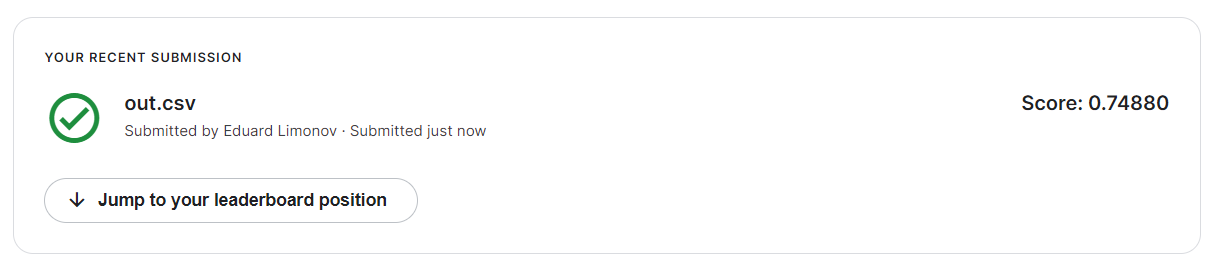